## 220107 AI & BD Python 실무 데이터 분석 연습 


In [2]:
import pandas as pd 
import numpy as np

from scipy import stats

**아래 Example 파일을 이용하여 분석을 실시 하고자 합니다.**

In [3]:
df1 = pd.read_csv('data/4_data.csv')
print(df1.shape)
df1.head(3)

(10000, 10)


,회원코드,프로그램,상태,프로그램가격,최종결제금액,결제시각,결제유형,채널,보조식품가격,보조식품(추가구매)
0,Y9RY2VSI,체중감량 프로그램 (타입B),completed,112500,112500,2017-04-14 오후 7:03:29.976000,Recurring,others,0,구매안함
1,3GTN3S3B,체중감량 프로그램 (타입B),completed,44780,44780,2017-05-23 오후 8:53:54.368000,Recurring,others,0,구매안함
2,6B0IG276,체중감량 프로그램 (타입 A),completed,132000,149000,2017-08-23 오후 11:39:21.840000,Recurring,facebook,17000,식이요법보조제A


In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   회원코드        10000 non-null  object
 1   프로그램        10000 non-null  object
 2   상태          10000 non-null  object
 3   프로그램가격      10000 non-null  int64 
 4   최종결제금액      10000 non-null  int64 
 5   결제시각        10000 non-null  object
 6   결제유형        10000 non-null  object
 7   채널          10000 non-null  object
 8   보조식품가격      10000 non-null  int64 
 9   보조식품(추가구매)  10000 non-null  object
dtypes: int64(3), object(7)
memory usage: 781.4+ KB


**1. 위의 데이터에서 각 "채널" 별 최종 결제금액의 차이가 있는지 확인하려 한다. Pivot_table을 이용하여, 각 채널 별 최종 결제금액의 평균을 계산하시오.**

In [4]:
df1_1pv = df1.pivot_table(index = '채널', values = '최종결제금액').reset_index()
df1_1pv

,채널,최종결제금액
0,direct,105512.323232
1,email,113118.376384
2,facebook,119932.625000
3,google,105529.000000
4,instagram,107958.181818
5,naver,110497.274529
6,others,107445.820144


**2. 위의 Pivot 결과를 이용하여, Bar Plot 시각화를 실시하시오.**

In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
mpl.rc('font', family = 'Malgun Gothic')

<AxesSubplot:xlabel='채널', ylabel='최종결제금액'>

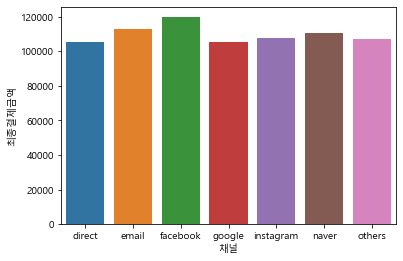

In [12]:
sns.barplot(data = df1_1pv, x = '채널', y = '최종결제금액')

<AxesSubplot:xlabel='채널', ylabel='최종결제금액'>

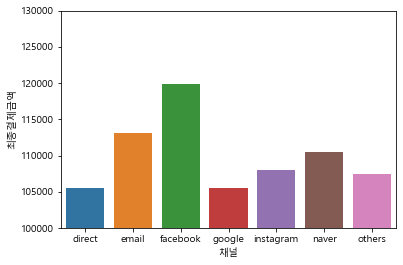

In [7]:
plt.ylim([100000, 130000])
sns.barplot(data = df1_1pv, x = '채널', y = '최종결제금액')


**3. 결제 시각 Column을 Datetime 형식으로 변환하시오.**

In [14]:
df1['결제시각'].head(1)

0    2017-04-14 오후 7:03:29.976000
Name: 결제시각, dtype: object

In [9]:
def get_datetime(x): 
    return x.split()[0]
df1['결제시각(dt)'] = pd.to_datetime(df1['결제시각'].apply(get_datetime))

In [35]:
df1['결제시각(dt)']

0      2017-04-14
1      2017-05-23
2      2017-08-23
3      2017-08-28
4      2017-05-07
          ...    
9995   2017-04-18
9996   2017-08-16
9997   2017-08-09
9998   2017-04-28
9999   2017-06-02
Name: 결제시각(dt), Length: 10000, dtype: datetime64[ns]

**4. 변환된 Datetime을 이용하여, 해당 데이터의 연도/월/주차/요일에 해당하는 파생변수를 생성하시오**

In [41]:

df1['결제연도(dt)'] = df1['결제시각(dt)'].dt.year
df1['결제월(dt)'] = df1['결제시각(dt)'].dt.month
df1['결제주차(dt)'] = df1['결제시각(dt)'].dt.isocalendar().week
df1['결제요일(dt)'] = df1['결제시각(dt)'].dt.day_name()
df1

,회원코드,프로그램,상태,프로그램가격,최종결제금액,결제시각,결제유형,채널,보조식품가격,보조식품(추가구매),결제시각(dt),결제연도(dt),결제월(dt),결제주차(dt),결제요일(dt)
0,Y9RY2VSI,체중감량 프로그램 (타입B),completed,112500,112500,2017-04-14 오후 7:03:29.976000,Recurring,others,0,구매안함,2017-04-14,2017,4,15,Friday
1,3GTN3S3B,체중감량 프로그램 (타입B),completed,44780,44780,2017-05-23 오후 8:53:54.368000,Recurring,others,0,구매안함,2017-05-23,2017,5,21,Tuesday
2,6B0IG276,체중감량 프로그램 (타입 A),completed,132000,149000,2017-08-23 오후 11:39:21.840000,Recurring,facebook,17000,식이요법보조제A,2017-08-23,2017,8,34,Wednesday
3,EMGRU2MO,체중감량 프로그램 (타입 A),completed,112500,112500,2017-08-28 오후 8:18:22.824000,Recurring,naver,0,구매안함,2017-08-28,2017,8,35,Monday
4,1ELG96TX,체중감량 프로그램 (타입B),completed,44780,44780,2017-05-07 오후 5:50:30.944000,Recurring,facebook,0,구매안함,2017-05-07,2017,5,18,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,118AFCQ9,체중감량 프로그램 (타입B),completed,112500,112500,2017-04-18 오전 12:43:58.104000,Recurring,facebook,0,구매안함,2017-04-18,2017,4,16,Tuesday
9996,VDE8FXV9,체중감량 프로그램 (타입 A),completed,112500,129500,2017-08-16 오전 10:03:10.136000,Recurring,facebook,17000,식이요법보조제A,2017-08-16,2017,8,33,Wednesday
9997,VWJ4NLZY,체중감량 프로그램 (타입 A),completed,112500,129500,2017-08-09 오전 11:47:55.408000,Recurring,facebook,17000,식이요법보조제A,2017-08-09,2017,8,32,Wednesday
9998,NJ2PR967,체중감량 프로그램 (타입B),cancelled,112500,129500,2017-04-28 오전 7:05:19.776000,Recurring,facebook,0,구매안함,2017-04-28,2017,4,17,Friday


**5. Pivot_table을 이용해 요일 별 최종 결제금액의 총 합을 계산하시오.**

In [42]:
df1.pivot_table(index = '결제요일(dt)', values = '최종결제금액', aggfunc = 'sum')

,최종결제금액
결제요일(dt),
Friday,145666260
Monday,189295840
Saturday,121267230
Sunday,131981470
Thursday,175124560
Tuesday,200173870
Wednesday,200687010


**6. Pivot_table을 이용해 주차 별 최종 결제금액의 총 합을 계산하시오.**

In [45]:
df1.pivot_table(index = '결제주차(dt)', values = '최종결제금액', aggfunc='sum').reset_index()

,결제주차(dt),최종결제금액
0,9,647500
1,10,5192680
2,11,21201000
3,12,22511940
4,13,22608080
5,14,18034360
6,15,31246460
7,16,34787440
8,17,44690380
9,18,43172540


**7. 주차 별 최종 결제금액의 총 합을 시각화 하고 img1.pdf 파일로 저장하시오. (저장파일 같이 제출)**

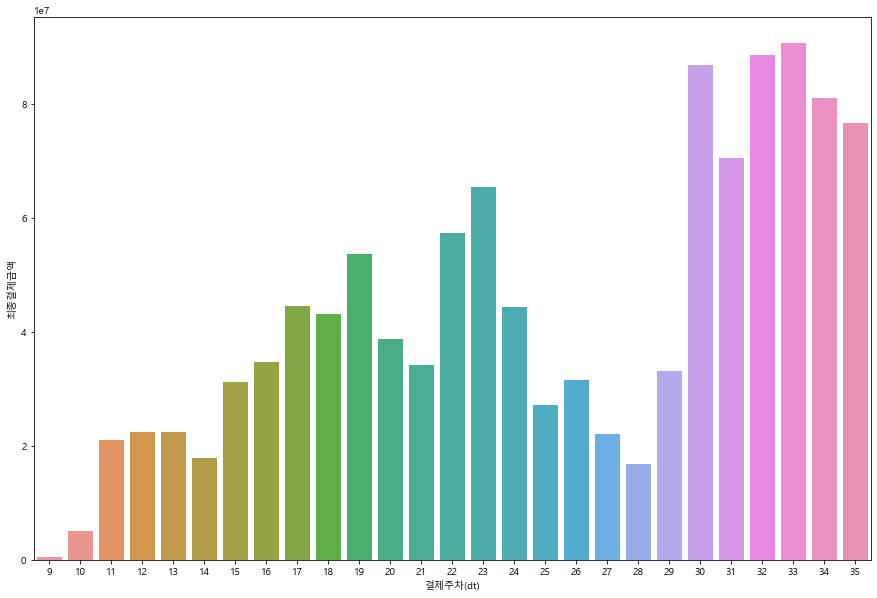

In [48]:
plt.figure(figsize=(15, 10))
sns.barplot(data = df1, x = '결제주차(dt)', y = '최종결제금액', estimator = sum, ci = None)
plt.savefig('img1.pdf')

**8. Pivot_table을 이용하여, 각 채널 별 최종 결제금액의 총합을 계산하시오.**

In [50]:
df1_pv8 = df1.pivot_table(index='채널', values = '최종결제금액', aggfunc='sum').reset_index()
df1_pv8

,채널,최종결제금액
0,direct,31337160
1,email,30655080
2,facebook,825136460
3,google,12663480
4,instagram,3562620
5,naver,111491750
6,others,149349690


 **9. 위의 Pivot 결과를 이용하여, Bar Plot 시각화를 실시하시오.**

<AxesSubplot:xlabel='채널', ylabel='최종결제금액'>

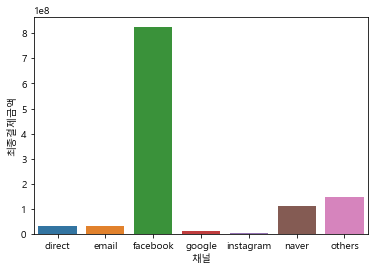

In [51]:
sns.barplot(data = df1_pv8, x = '채널', y = '최종결제금액')

위의 결과를 바탕으로 'Facebook' 채널에 대해 마케팅을 강화하고자 한다. 

**10. 불러온 데이터에서, 'Facebook' 채널에 해당하는 Row만 추출하여, 새로운 데이터 프레임으로 선언하고, 상위 5개 항목에 대해 출력하시오.**

In [57]:
df1_fb = df1.loc[(df1['채널'] == 'facebook')].sort_values(by = '최종결제금액', ascending = False)
df1_fb.head(5)

,회원코드,프로그램,상태,프로그램가격,최종결제금액,결제시각,결제유형,채널,보조식품가격,보조식품(추가구매),결제시각(dt),결제연도(dt),결제월(dt),결제주차(dt),결제요일(dt)
4165,35OZZBQ9,체중감량 프로그램 (타입 A),completed,177000,210000,2017-06-03 오후 7:29:35.368000,Recurring,facebook,33000,식이요법보조제B,2017-06-03,2017,6,22,Saturday
4928,JDH0HI93,체중감량 프로그램 (타입 A),completed,177000,194000,2017-06-05 오후 1:27:24.872000,Recurring,facebook,17000,식이요법보조제A,2017-06-05,2017,6,23,Monday
2581,SPBGROKC,체중감량 프로그램 (타입 A),cancelled,177000,194000,2017-06-03 오전 2:24:29.776000,Recurring,facebook,0,구매안함,2017-06-03,2017,6,22,Saturday
3950,QHLHEWLK,체중감량 프로그램 (타입 A),completed,177000,194000,2017-06-03 오전 2:24:18.776000,Recurring,facebook,17000,식이요법보조제A,2017-06-03,2017,6,22,Saturday
4006,FRM4EROO,체중감량 프로그램 (타입 A),cancelled,177000,194000,2017-06-04 오전 10:33:32.040000,Recurring,facebook,0,구매안함,2017-06-04,2017,6,22,Sunday


**11. 추출된 'facebook' 채널 데이터를 이용하여, 해당 데이터의 '프로그램' Column의 항목 별 Count를 시각화 하시오.**

<AxesSubplot:xlabel='프로그램', ylabel='count'>

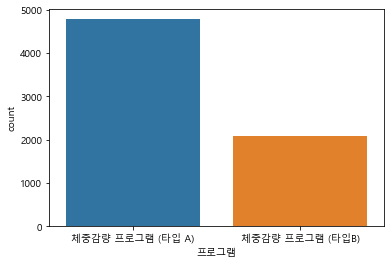

In [58]:
sns.countplot(data = df1_fb, x = '프로그램')

**12. 추출된 데이터에서, '체중감량 프로그램 (타입 A)' 프로그램의 사용자 중, 결제를 최근 진행한 고객 상위 40명의 List를 선별해 "weight_member.xlsx"파일로 저장하시오.(저장 파일 같이 제출)**

In [64]:
df1_fb_A = df1_fb.loc[df1_fb['프로그램'] == '체중감량 프로그램 (타입 A)'].sort_values(by = '결제시각(dt)', ascending = False).head(40)
df1_fb_A.to_excel('weight_member.xlsx')
df1_fb_A

,회원코드,프로그램,상태,프로그램가격,최종결제금액,결제시각,결제유형,채널,보조식품가격,보조식품(추가구매),결제시각(dt),결제연도(dt),결제월(dt),결제주차(dt),결제요일(dt)
5460,98Q1ASSO,체중감량 프로그램 (타입 A),refunded,112500,145500,2017-08-31 오전 9:33:26.328000,Recurring,facebook,33000,식이요법보조제B,2017-08-31,2017,8,35,Thursday
6372,HQWXWTV9,체중감량 프로그램 (타입 A),cancelled,112500,112500,2017-08-31 오후 12:35:02.376000,Recurring,facebook,0,구매안함,2017-08-31,2017,8,35,Thursday
9869,59CDOHOC,체중감량 프로그램 (타입 A),completed,112500,129500,2017-08-31 오전 7:58:11.664000,Recurring,facebook,17000,식이요법보조제A,2017-08-31,2017,8,35,Thursday
3039,THNBBYNU,체중감량 프로그램 (타입 A),completed,112500,145500,2017-08-31 오후 2:34:30.840000,Recurring,facebook,33000,식이요법보조제B,2017-08-31,2017,8,35,Thursday
8971,DWKXMBFV,체중감량 프로그램 (타입 A),completed,112500,112500,2017-08-31 오후 6:26:42.040000,Recurring,facebook,0,구매안함,2017-08-31,2017,8,35,Thursday
3689,7WM84YRX,체중감량 프로그램 (타입 A),cancelled,112500,129500,2017-08-31 오후 3:15:34.928000,Recurring,facebook,0,구매안함,2017-08-31,2017,8,35,Thursday
9498,21K66U99,체중감량 프로그램 (타입 A),completed,112500,129500,2017-08-31 오전 12:25:24.632000,Recurring,facebook,17000,식이요법보조제A,2017-08-31,2017,8,35,Thursday
3566,KV7YMDEG,체중감량 프로그램 (타입 A),completed,112500,145500,2017-08-31 오후 10:39:24.056000,Recurring,facebook,33000,식이요법보조제B,2017-08-31,2017,8,35,Thursday
4870,K9UZ2FAW,체중감량 프로그램 (타입 A),cancelled,112500,145500,2017-08-31 오후 6:57:45.584001,Recurring,facebook,0,구매안함,2017-08-31,2017,8,35,Thursday
9222,MVL7T446,체중감량 프로그램 (타입 A),completed,112500,112500,2017-08-31 오후 8:28:01.184000,Recurring,facebook,0,구매안함,2017-08-31,2017,8,35,Thursday
